In [2]:
# First, I import all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, accuracy_score, f1_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

from mlxtend.frequent_patterns import apriori, association_rules

# Now I load the dataset using the full file path
df = pd.read_csv(r"C:\Users\DELL\Downloads\customer_data.csv")
print("Preview of the dataset:")
print(df.head())



Preview of the dataset:
   Age  Income  SpendingScore  Purchased
0   56   72733             90          1
1   46   85318             62          1
2   32   43664             23          0
3   60   87172              9          0
4   25   46736             12          0


In [3]:
# I check for missing values to ensure data quality
print("\nChecking for null values:")
print(df.isnull().sum())

# I separate the features and the target column
X = df.drop("Purchased", axis=1)
y = df["Purchased"]

# I scale the feature values for better model performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# I split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)




Checking for null values:
Age              0
Income           0
SpendingScore    0
Purchased        0
dtype: int64


In [4]:
# I build and train a Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# I make predictions and evaluate the model
y_pred_dt = dt.predict(X_test)

print("\nDecision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))



Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       1.00      1.00      1.00         8

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



In [5]:
# I tune the hyperparameter 'k' using GridSearchCV
param_grid = {'n_neighbors': list(range(1, 21))}
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid.fit(X_train, y_train)

# I use the best model from GridSearchCV
best_knn = grid.best_estimator_
y_pred_knn = best_knn.predict(X_test)

print(f"Best value for k: {grid.best_params_['n_neighbors']}")
print("\nk-NN Classification Report:")
print(classification_report(y_test, y_pred_knn))


Best value for k: 17

k-NN Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       1.00      1.00      1.00         8

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



Confusion Matrix:
[[32  0]
 [ 0  8]]
Accuracy: 1.0
F1 Score: 1.0


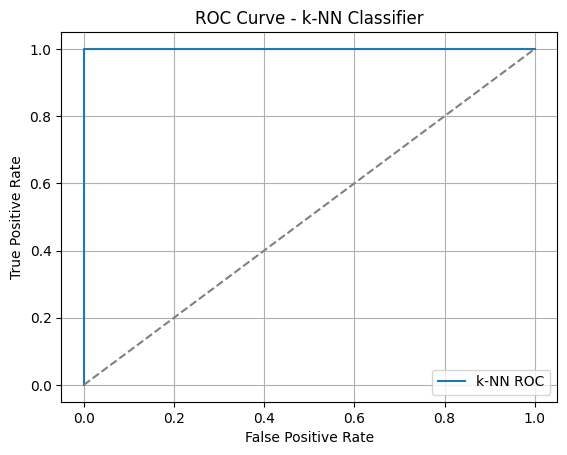

In [6]:
# I print confusion matrix and performance metrics
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("F1 Score:", f1_score(y_test, y_pred_knn))

# I generate the ROC curve for visual evaluation
y_probs = best_knn.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_probs[:, 1])

plt.figure()
plt.plot(fpr, tpr, label='k-NN ROC')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - k-NN Classifier")
plt.legend()
plt.grid(True)
plt.show()


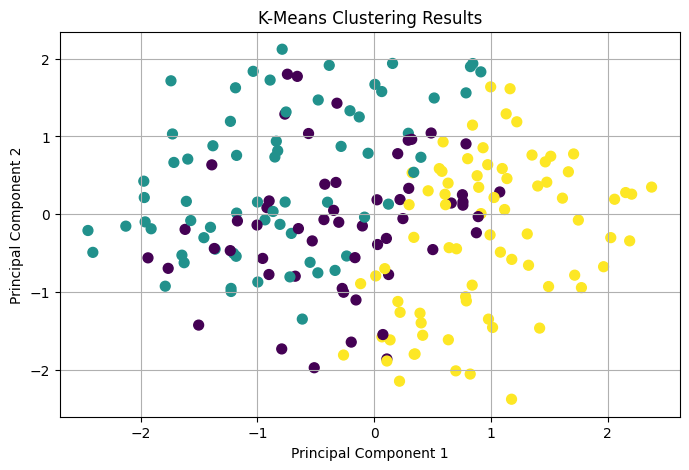

In [7]:
# I apply K-Means clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# I reduce dimensionality using PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# I plot the cluster results in 2D space
plt.figure(figsize=(8, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', s=50)
plt.title("K-Means Clustering Results")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()


In [8]:
# I convert continuous features to categorical for mining
df_binned = df.copy()
df_binned['Age'] = pd.cut(df_binned['Age'], bins=3, labels=["Young", "Middle", "Old"])
df_binned['Income'] = pd.cut(df_binned['Income'], bins=3, labels=["Low", "Medium", "High"])
df_binned['SpendingScore'] = pd.cut(df_binned['SpendingScore'], bins=3, labels=["Low", "Medium", "High"])

# I encode the data for Apriori
df_hot = pd.get_dummies(df_binned.drop("Purchased", axis=1))

# I find frequent itemsets using Apriori algorithm
frequent_itemsets = apriori(df_hot, min_support=0.2, use_colnames=True)

# I generate association rules from the itemsets
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)

# I display the top rules
print("Top Association Rules:")
print(rules[['antecedents', 'consequents', 'support', 'confidence']].head())


Top Association Rules:
Empty DataFrame
Columns: [antecedents, consequents, support, confidence]
Index: []
